In [2]:
import os
import glob
from osgeo import gdal
import rasterio
import numpy as np
import sklearn
from matplotlib import pyplot as plt

In [2]:
#Reading Images
image_names = glob.glob(r'Test Data/Images/*.tif')
print(image_names)

['Test Data/Images/img1043.tif', 'Test Data/Images/img138.tif', 'Test Data/Images/img559.tif', 'Test Data/Images/img588.tif', 'Test Data/Images/img377.tif', 'Test Data/Images/img716.tif', 'Test Data/Images/img401.tif', 'Test Data/Images/img873.tif', 'Test Data/Images/img144.tif', 'Test Data/Images/img282.tif', 'Test Data/Images/img46.tif', 'Test Data/Images/img957.tif', 'Test Data/Images/img525.tif', 'Test Data/Images/img253.tif', 'Test Data/Images/img986.tif', 'Test Data/Images/img97.tif', 'Test Data/Images/img632.tif', 'Test Data/Images/img195.tif', 'Test Data/Images/img143.tif', 'Test Data/Images/img1038.tif', 'Test Data/Images/img41.tif', 'Test Data/Images/img522.tif', 'Test Data/Images/img950.tif', 'Test Data/Images/img285.tif', 'Test Data/Images/img981.tif', 'Test Data/Images/img90.tif', 'Test Data/Images/img254.tif', 'Test Data/Images/img192.tif', 'Test Data/Images/img635.tif', 'Test Data/Images/img808.tif', 'Test Data/Images/img698.tif', 'Test Data/Images/img1044.tif', 'Test Da

In [3]:
image_names.sort()
print(image_names)

['Test Data/Images/img1.tif', 'Test Data/Images/img10.tif', 'Test Data/Images/img100.tif', 'Test Data/Images/img1000.tif', 'Test Data/Images/img1001.tif', 'Test Data/Images/img1002.tif', 'Test Data/Images/img1003.tif', 'Test Data/Images/img1004.tif', 'Test Data/Images/img1005.tif', 'Test Data/Images/img1006.tif', 'Test Data/Images/img1007.tif', 'Test Data/Images/img1008.tif', 'Test Data/Images/img1009.tif', 'Test Data/Images/img101.tif', 'Test Data/Images/img1010.tif', 'Test Data/Images/img1011.tif', 'Test Data/Images/img1012.tif', 'Test Data/Images/img1013.tif', 'Test Data/Images/img1014.tif', 'Test Data/Images/img1015.tif', 'Test Data/Images/img1016.tif', 'Test Data/Images/img1017.tif', 'Test Data/Images/img1018.tif', 'Test Data/Images/img1019.tif', 'Test Data/Images/img102.tif', 'Test Data/Images/img1020.tif', 'Test Data/Images/img1021.tif', 'Test Data/Images/img1022.tif', 'Test Data/Images/img1023.tif', 'Test Data/Images/img1024.tif', 'Test Data/Images/img1025.tif', 'Test Data/Imag

In [4]:
print(len(image_names))

1080


In [5]:
images_names_ = [gdal.Open(img).ReadAsArray() for img in image_names]

In [6]:
image_dataset = np.array(images_names_)

In [7]:
# image_dataset_ = np.asarray(image_dataset, dtype=int)
image_dataset_ = np.asarray(image_dataset, dtype='int8')

In [8]:
image_dataset_

array([[[[ -72,  -96, -104, ...,  -73,  -63,  -64],
         [-106,  -83,  -92, ...,  -55,  -58,  -61],
         [-115,  -86,  -69, ...,  -59,  -61,  -60],
         ...,
         [-114, -116, -115, ..., -120, -118, -117],
         [-116, -115, -115, ..., -118, -117, -118],
         [-117, -113, -116, ..., -118, -118, -118]],

        [[ -82, -103, -111, ..., -106, -100, -102],
         [-114,  -91,  -99, ...,  -88,  -96,  -99],
         [-123,  -95,  -78, ...,  -93,  -98,  -98],
         ...,
         [-124, -126, -125, ..., -127, -124, -124],
         [-126, -126, -126, ..., -124, -123, -125],
         [-127, -123, -126, ..., -125, -124, -125]],

        [[ -83, -104, -112, ..., -106, -100, -104],
         [-116,  -92, -100, ...,  -89,  -97, -101],
         [-123,  -95,  -78, ...,  -93, -100, -101],
         ...,
         [ 126,  124,  125, ...,  126, -128, -128],
         [ 123,  125,  125, ..., -128, -127,  127],
         [ 123,  126,  124, ..., -128, -128,  127]],

        [[  69, 

In [9]:
image_dataset_.shape

(1080, 5, 512, 512)

In [10]:
image_dataset_.dtype

dtype('int8')

In [11]:
#Reading Masks

mask_names = glob.glob(r'Test Data/masks/*.tif')
print(mask_names)

['Test Data/masks/mask545.tif.tif', 'Test Data/masks/mask492.tif.tif', 'Test Data/masks/mask277.tif.tif', 'Test Data/masks/mask350.tif.tif', 'Test Data/masks/mask287.tif.tif', 'Test Data/masks/mask628.tif.tif', 'Test Data/masks/mask462.tif.tif', 'Test Data/masks/mask354.tif.tif', 'Test Data/masks/mask466.tif.tif', 'Test Data/masks/mask283.tif.tif', 'Test Data/masks/mask541.tif.tif', 'Test Data/masks/mask848.tif.tif', 'Test Data/masks/mask273.tif.tif', 'Test Data/masks/mask496.tif.tif', 'Test Data/masks/mask624.tif.tif', 'Test Data/masks/mask23.tif.tif', 'Test Data/masks/mask116.tif.tif', 'Test Data/masks/mask967.tif.tif', 'Test Data/masks/mask2.tif.tif', 'Test Data/masks/mask840.tif.tif', 'Test Data/masks/mask1007.tif.tif', 'Test Data/masks/mask703.tif.tif', 'Test Data/masks/mask549.tif.tif', 'Test Data/masks/mask997.tif.tif', 'Test Data/masks/mask6.tif.tif', 'Test Data/masks/mask1003.tif.tif', 'Test Data/masks/mask844.tif.tif', 'Test Data/masks/mask993.tif.tif', 'Test Data/masks/mask7

In [12]:
mask_names.sort()
print(mask_names)

['Test Data/masks/mask1.tif.tif', 'Test Data/masks/mask10.tif.tif', 'Test Data/masks/mask100.tif.tif', 'Test Data/masks/mask1000.tif.tif', 'Test Data/masks/mask1001.tif.tif', 'Test Data/masks/mask1002.tif.tif', 'Test Data/masks/mask1003.tif.tif', 'Test Data/masks/mask1004.tif.tif', 'Test Data/masks/mask1005.tif.tif', 'Test Data/masks/mask1006.tif.tif', 'Test Data/masks/mask1007.tif.tif', 'Test Data/masks/mask1008.tif.tif', 'Test Data/masks/mask1009.tif.tif', 'Test Data/masks/mask101.tif.tif', 'Test Data/masks/mask1010.tif.tif', 'Test Data/masks/mask1011.tif.tif', 'Test Data/masks/mask1012.tif.tif', 'Test Data/masks/mask1013.tif.tif', 'Test Data/masks/mask1014.tif.tif', 'Test Data/masks/mask1015.tif.tif', 'Test Data/masks/mask1016.tif.tif', 'Test Data/masks/mask1017.tif.tif', 'Test Data/masks/mask1018.tif.tif', 'Test Data/masks/mask1019.tif.tif', 'Test Data/masks/mask102.tif.tif', 'Test Data/masks/mask1020.tif.tif', 'Test Data/masks/mask1021.tif.tif', 'Test Data/masks/mask1022.tif.tif',

In [13]:
print(len(mask_names))

1080


In [14]:
mask_names_ = [gdal.Open(mask).ReadAsArray() for mask in mask_names]

In [15]:
mask_dataset = np.array(mask_names_)

In [16]:
# mask_dataset_ = np.asarray(mask_dataset, dtype = int)
mask_dataset_ = np.asarray(mask_dataset, dtype = 'int8')

In [17]:
mask_dataset_

array([[[  0,   0,   0, ...,  -2,  -2,  -2],
        [  0,   0,   0, ...,  -2,  -2,  -2],
        [  0,   0,   0, ...,  -2,  -2,  -2],
        ...,
        [  0,   0,   0, ..., 127, 127, 127],
        [  0,   0,   0, ..., 127, 127, 127],
        [  0,   0,   0, ..., 127, 127, 127]],

       [[127, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127],
        [127, 127, 127, ..., 127, 127, 127],
        ...,
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2]],

       ...,

       [[ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2],
        [ -2,  -2,  -2, ...,  -2,  -2,  -2

In [18]:
mask_dataset_.dtype

dtype('int8')

In [19]:
_mask_dataset_ = np.copy(mask_dataset_) #Make a copy

In [20]:
_mask_dataset_[_mask_dataset_ == -2] = 0

In [21]:
#Maximum and Minimum value in images
print(np.nanmax(image_dataset_))
print(np.nanmin(image_dataset_))

127
-128


In [22]:
#Maximum and Minimum value in Masks
print(np.nanmax(_mask_dataset_))
print(np.nanmin(_mask_dataset_))

127
0


In [23]:
#Labels in the mask are
np.unique(_mask_dataset_)

array([  0, 127], dtype=int8)

In [24]:
print(image_dataset_.shape)
print(_mask_dataset_.shape)

(1080, 5, 512, 512)
(1080, 512, 512)


In [25]:
#Normalize images
new_image_dataset = image_dataset_ /127.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
new_mask_dataset = _mask_dataset_ /127.  #Pixel values will be 0 or 1

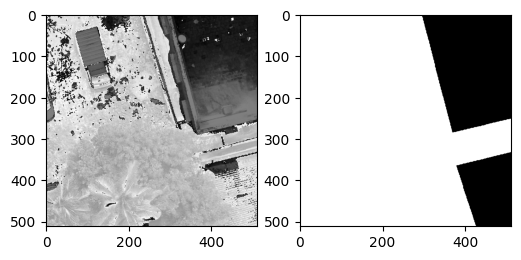

In [26]:
#Sanity check, view few mages
import random

image_number = random.randint(0, len(new_image_dataset))
plt.figure(figsize=(6, 6))
plt.subplot(121)
plt.imshow(new_image_dataset[image_number,2,:,:], cmap='gray')
plt.subplot(122)
plt.imshow(new_mask_dataset[image_number], cmap='gray')
plt.show()

In [27]:
# Dimension expanding only for labels
# new_image_dataset = np.expand_dims(image_dataset_, axis = 4)
new_mask_dataset_ = np.expand_dims(new_mask_dataset, axis = 3)

In [28]:
#Check shape of images and mask 
print(new_image_dataset.shape)
print(new_mask_dataset_.shape)

(1080, 5, 512, 512)
(1080, 512, 512, 1)


In [29]:
#Maximum in image dataset and unique value in mask dataset after normalization 
print(np.nanmax(new_image_dataset))
print(np.nanmin(new_image_dataset))
print(np.unique(new_mask_dataset_))

1.0
-1.0078740157480315
[0. 1.]


In [30]:
print(new_image_dataset.dtype)
print(new_mask_dataset_.dtype)

float64
float64


In [31]:
from sklearn.model_selection import train_test_split

In [33]:
#Training and Testing Splitting
X_train, X_test, y_train, y_test = train_test_split(new_image_dataset, new_mask_dataset_, test_size = 0.60, random_state = 42)

In [34]:
#Checking shape of training testing images and masks
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(432, 5, 512, 512)
(432, 512, 512, 1)
(648, 5, 512, 512)
(648, 512, 512, 1)


In [35]:
#Checking data type of training testing images and masks
print(X_train.dtype)
print(y_train.dtype)
print(X_test.dtype)
print(y_test.dtype)

float64
float64
float64
float64


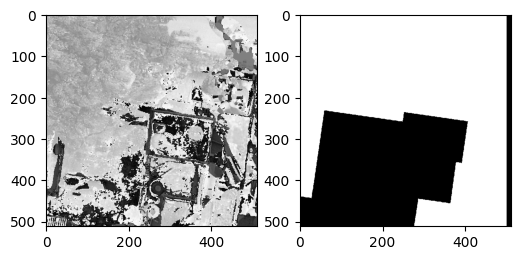

In [36]:
#Sanity check, view few images and masks
import random

image_number = random.randint(0, len(X_train)-1)
plt.figure(figsize=(6, 6))
plt.subplot(121)
plt.imshow(X_train[image_number,2,:,:], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[image_number,:,:,0], cmap='gray')
plt.show()
# plt.savefig("E://ss.png")

In [37]:
X_train_ = np.transpose(X_train, (0, 2, 3, 1))
X_test_ = np.transpose(X_test, (0, 2, 3, 1))
print(X_train_.shape)
print(X_test_.shape)

(432, 512, 512, 5)
(648, 512, 512, 5)


In [3]:
#Unet Implementation
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
import tensorflow as tf
import keras
from keras.utils import normalize
from tensorflow.keras.metrics import MeanIoU
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from keras import backend as K

In [4]:
from keras.layers import Input
from keras.layers.convolutional import Convolution2D
from keras.layers.core import Activation, Reshape
from keras.models import Model

In [5]:
from tensorflow.keras.layers import Input, Conv2D, Convolution2D, BatchNormalization, Activation, MaxPool2D, MaxPooling2D, Conv2DTranspose, UpSampling2D, Concatenate, Dropout, Lambda
from tensorflow.keras.models import Model
from keras.layers import Activation, MaxPool2D, Concatenate

In [6]:
from keras_preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array
from keras.layers import Layer
import argparse

In [7]:
from keras.applications import vgg16, inception_v3, mobilenet
from keras.preprocessing.image import ImageDataGenerator

In [8]:
from tensorflow.keras.applications.vgg16 import VGG16

In [9]:
#Let us import VGG16 model with imagenet weights from keras.

img1_shape = (224,224,3)
model_224 = VGG16(include_top=False, weights='imagenet', input_shape=img1_shape)
print(model_224.summary())
#plot_model(model_224, to_file='model_224.png', show_shapes=True, show_layer_names=True)


2022-12-13 07:19:47.774708: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
#our multi channels, will throw an error
my_shape = (512,512,5)
model_512_5 = VGG16(include_top=False, weights='imagenet', input_shape=my_shape)
print(model_512_5.summary())

In [10]:
# Build VGG16 for 512 x 512 x 5 channels 

#Import vgg model by not defining an input shape. 
vgg_model = VGG16(include_top=False, weights='imagenet')
print(vgg_model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

In [11]:
#Get the dictionary of config for vgg16
vgg_config = vgg_model.get_config()

In [12]:
# Change the input shape to new desired shape
h, w, c = 512, 512, 5
vgg_config["layers"][0]["config"]["batch_input_shape"] = (None, h, w, c)

In [13]:
#Create new model with the updated configuration
vgg_updated = Model.from_config(vgg_config)
print(vgg_updated.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 5)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      2944      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

In [14]:
# Check Weights of first conv layer in the original model...
orig_model_conv1_block1_wts = vgg_model.layers[1].get_weights()[0]

print(orig_model_conv1_block1_wts[:,:,0,0])
print(orig_model_conv1_block1_wts[:,:,1,0])
print(orig_model_conv1_block1_wts[:,:,2,0])

[[ 0.42947057  0.373467   -0.06136011]
 [ 0.27476987  0.03868078 -0.36722335]
 [-0.05746817 -0.26224968 -0.35009676]]
[[ 0.55037946  0.44007453 -0.08138704]
 [ 0.34573907  0.04063221 -0.4535013 ]
 [-0.05863491 -0.33066967 -0.4850302 ]]
[[ 0.4800154   0.4085474  -0.06514555]
 [ 0.31047726  0.05020237 -0.40338343]
 [-0.05087169 -0.2852275  -0.41851634]]


In [15]:
# Check Weights of first conv layer in the new model...
new_model_conv1_block1_wts = vgg_updated.layers[1].get_weights()[0]
print(new_model_conv1_block1_wts[:,:,0,0])
print(new_model_conv1_block1_wts[:,:,1,0])
print(new_model_conv1_block1_wts[:,:,2,0])
print(new_model_conv1_block1_wts[:,:,3,0])
print(new_model_conv1_block1_wts[:,:,4,0])
#Random weights....

[[-0.0312185  -0.03696152 -0.04371559]
 [ 0.0845686   0.01147805 -0.00670141]
 [ 0.05581184  0.04869115 -0.00309858]]
[[ 0.06858558 -0.07180282  0.0300255 ]
 [-0.07749127  0.07634788 -0.09238335]
 [-0.04044751  0.02367602  0.03444869]]
[[-0.00700565  0.05408811  0.05545241]
 [-0.08421513  0.07761303 -0.03152128]
 [ 0.08242538 -0.03988247  0.00249527]]
[[-0.06415679 -0.05565696  0.05914255]
 [-0.00564783 -0.09447186  0.05145984]
 [-0.08257396 -0.01891983  0.01045536]]
[[-0.00197714  0.09736281 -0.07408685]
 [ 0.01527645 -0.06095806 -0.0291236 ]
 [ 0.07634058 -0.03820153  0.09198446]]


In [16]:
# Function that calculates average of weights along the channel axis and then
#copies it over n number of times. n being the new channels that need to be concatenated with the original channels. 
def avg_and_copy_wts(weights, num_channels_to_fill):  
    average_weights = np.mean(weights, axis=-2).reshape(weights[:,:,-1:,:].shape)  
    wts_copied_to_mult_channels = np.tile(average_weights, (num_channels_to_fill, 1)) 
    return(wts_copied_to_mult_channels)

In [17]:
#Get the configuration for the updated model and extract layer names. 
#We will use these names to copy over weights from the original model. 
vgg_updated_config = vgg_updated.get_config()
vgg_updated_layer_names = [vgg_updated_config['layers'][x]['name'] for x in range(len(vgg_updated_config['layers']))]

In [18]:
#Name of the first convolutional layer.
#Remember that this is the only layer with new additional weights. All other layers
#will have same weights as the original model. 
first_conv_name = vgg_updated_layer_names[1]
print(first_conv_name)

block1_conv1


In [19]:
#Update weights for all layers. And for the first conv layer, copy the first
#three layer weights and fill others with the average of all three. 
for layer in vgg_model.layers:
    if layer.name in vgg_updated_layer_names:
     
      if layer.get_weights() != []:  #All convolutional layers and layers with weights (no input layer or any pool layers)
        target_layer = vgg_updated.get_layer(layer.name)
    
        if layer.name in first_conv_name:    #For the first convolutionl layer
            weights = layer.get_weights()[0]
            biases  = layer.get_weights()[1]
    
            weights_extra_channels = np.concatenate((weights,   #Keep the first 3 channel weights as-is and copy the weights for additional channels.
                                                    avg_and_copy_wts(weights, c - 3)),  # - 3 as we already have weights for the 3 existing channels in our model. 
                                                    axis=-2)
                                                  
            target_layer.set_weights([weights_extra_channels, biases])  #Now set weights for the first conv. layer
            target_layer.trainable = False   #You can make this trainable if you want. 
    
        else:
            target_layer.set_weights(layer.get_weights())   #Set weights to all other layers. 
            target_layer.trainable = False  #You can make this trainable if you want. 

In [20]:
# Check Weights of first conv layer in the new model...
#Compare against the original model weights
new_model_conv1_block1_wts_updated = vgg_updated.layers[1].get_weights()[0]
print(new_model_conv1_block1_wts_updated[:,:,0,0])
print(new_model_conv1_block1_wts_updated[:,:,1,0])
print(new_model_conv1_block1_wts_updated[:,:,2,0])
print(new_model_conv1_block1_wts_updated[:,:,3,0])
print(new_model_conv1_block1_wts_updated[:,:,4,0])

[[ 0.42947057  0.373467   -0.06136011]
 [ 0.27476987  0.03868078 -0.36722335]
 [-0.05746817 -0.26224968 -0.35009676]]
[[ 0.55037946  0.44007453 -0.08138704]
 [ 0.34573907  0.04063221 -0.4535013 ]
 [-0.05863491 -0.33066967 -0.4850302 ]]
[[ 0.4800154   0.4085474  -0.06514555]
 [ 0.31047726  0.05020237 -0.40338343]
 [-0.05087169 -0.2852275  -0.41851634]]
[[ 0.48662183  0.40736297 -0.06929757]
 [ 0.31032872  0.04317178 -0.40803602]
 [-0.05565825 -0.29271564 -0.4178811 ]]
[[ 0.48662183  0.40736297 -0.06929757]
 [ 0.31032872  0.04317178 -0.40803602]
 [-0.05565825 -0.29271564 -0.4178811 ]]


In [21]:
print(vgg_updated.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 5)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      2944      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     0     

In [22]:
class MaxPoolingWithArgmax2D(Layer):

    def __init__(
            self,
            pool_size=(2, 2),
            strides=(2, 2),
            padding='same',
            **kwargs):
        super(MaxPoolingWithArgmax2D, self).__init__(**kwargs)
        self.padding = padding
        self.pool_size = pool_size
        self.strides = strides
    
    def call(self, inputs, **kwargs):
        padding = self.padding
        pool_size = self.pool_size
        strides = self.strides
        ksize = [1, pool_size[0], pool_size[1], 1]
        padding = padding.upper()
        strides = [1, strides[0], strides[1], 1]
        output, argmax = tf.nn.max_pool_with_argmax(
            inputs,
            ksize=ksize,
            strides=strides,
            padding=padding)

        argmax = K.cast(argmax, K.floatx())
        return [output, argmax]
       
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            "padding": self.padding,
            "pool_size": self.pool_size,
            "strides": self.strides
        })
        return config
    
    def compute_output_shape(self, input_shape):
        ratio = (1, 2, 2, 1)
        output_shape = [
            dim // ratio[idx]
            if dim is not None else None
            for idx, dim in enumerate(input_shape)]
        output_shape = tuple(output_shape)
        return [output_shape, output_shape]

    def compute_mask(self, inputs, mask=None):
        return 2 * [None]
    
class MaxUnpooling2D(Layer):
    def __init__(self, size=(2, 2), **kwargs):
        super(MaxUnpooling2D, self).__init__(**kwargs)
        self.size = size

    def call(self, inputs, output_shape=None):
        updates, mask = inputs[0], inputs[1]
        with tf.compat.v1.variable_scope(self.name):
            mask = K.cast(mask, 'int32')
            input_shape = tf.shape(updates, out_type='int32')

            if output_shape is None:
                output_shape = (
                    input_shape[0],
                    input_shape[1] * self.size[0],
                    input_shape[2] * self.size[1],
                    input_shape[3])

            ret = tf.scatter_nd(K.expand_dims(K.flatten(mask)),
                                  K.flatten(updates),
                                  [K.prod(output_shape)])

            input_shape = updates.shape
            out_shape = [-1,
                         input_shape[1] * self.size[0],
                         input_shape[2] * self.size[1],
                         input_shape[3]]
        return K.reshape(ret, out_shape)
    
    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'size': self.size
        })
        return config

    def compute_output_shape(self, input_shape):
        mask_shape = input_shape[1]
        return (
                mask_shape[0],
                mask_shape[1]*self.size[0],
                mask_shape[2]*self.size[1],
                mask_shape[3]
                )

In [23]:
vgg_updated.layers[-19].output

<KerasTensor: shape=(None, 512, 512, 5) dtype=float32 (created by layer 'input_2')>

In [25]:
vgg_updated.get_layer("block5_pool").output 

<KerasTensor: shape=(None, 16, 16, 512) dtype=float32 (created by layer 'block5_pool')>

In [49]:
def conv_block(inputs, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(inputs)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = Dropout(0.5)(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)

    return x

def decoder_block(inputs, num_filters):
    x = UpSampling2D(size=(2,2))(inputs)
    x = conv_block(x, num_filters)
    return x

In [52]:
def build_vgg16_segnet(input_shape):
    """ Input """
    # input_shape = (None, 512, 512, 5)
    input_shape = vgg_updated.layers[-19].output
    inputs = input_shape
    # inputs = Input(shape = input_shape)
    
    """ Encoder from Pre-trained VGG16 updated Model """

    p1 = vgg_updated.get_layer("block1_pool").output         ## (256 , 256) 64
    p2 = vgg_updated.get_layer("block2_pool").output         ## (128, 128) 128
    p3 = vgg_updated.get_layer("block3_pool").output         ## (64, 64) 256
    p4 = vgg_updated.get_layer("block4_pool").output         ## (32, 32) 512
    p5 = vgg_updated.get_layer("block5_pool").output         ## (16, 16) 512
    
    """ Decoder """
    d1 = decoder_block(p5, 512)                        
    d2 = decoder_block(d1, 512)                   
    d3 = decoder_block(d2, 256)                     
    d4 = decoder_block(d3, 128)      
    d5 = decoder_block(d4, 64)  
    
    """ Output """
    outputs = Conv2D(1, 1, padding="same", activation="sigmoid")(d5)
    
    model = Model(inputs = inputs, outputs = outputs, name = "VGG16_U-Net")
    return model

if __name__ == "__main__":
    input_shape = vgg_updated.layers[-19].output
    model = build_vgg16_segnet(input_shape)
    model.summary()

Model: "VGG16_U-Net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 512, 512, 5)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 512, 512, 64)      2944      
                                                                 
 block1_conv2 (Conv2D)       (None, 512, 512, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 256, 256, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 256, 256, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 256, 256, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 128, 128, 128)     

In [53]:
from keras.utils import plot_model

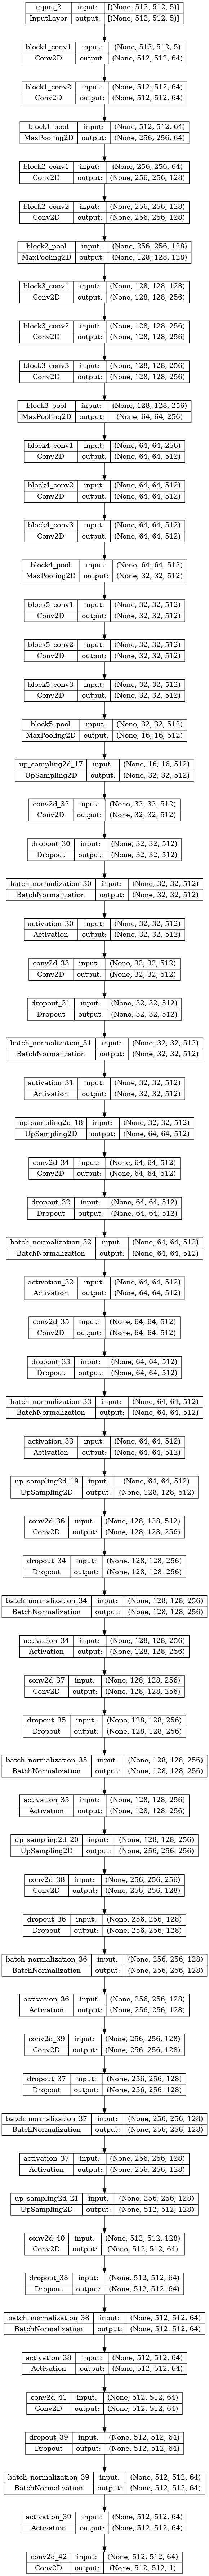

In [54]:
keras.utils.plot_model(model, "VGG16_SegNet_1.17Cr_WO_PoolT.png", show_shapes=True)

In [71]:
# #computing class weights
# def calculating_class_weights(y_true):
#     from sklearn.utils.class_weight import compute_class_weight
#     number_dim = np.shape(y_true)[1]
#     weights = np.empty([number_dim, 2])
#     for i in range(number_dim):
#         weights[i] = compute_class_weight('balanced', [0.,1.], y_true[:, i])
#     return weights

In [81]:
# def get_weighted_loss(weights):
#     def weighted_loss(y_true, y_pred):
#         return K.mean((weights[:,0]**(1-y_true))*(weights[:,1]**(y_true))*K.binary_crossentropy(y_true, y_pred), axis=-1)
#     return weighted_loss

In [82]:
"# Metrics"

#f1, recall, precision metrics, and jacard coefficient

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def jacard_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

In [86]:
# # compile keras model with defined optimizer, loss and metrics
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc',f1_m,precision_m, recall_m, jacard_coef])

In [ ]:
# callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(X_train_, y_train,
                    batch_size=16,
                    verbose=1,
                    epochs=50,
                    validation_data=(X_test_, y_test))
                    # callbacks=[callback],
                    # shuffle=False)
# len(history.history['loss'])
# Two things will try - try without callback epochs 50, and try only check point and try together with patience: 5 again

Epoch 1/50
41/41 [==============================] - 1529s 37s/step - loss: 0.6095 - acc: 0.6823 - f1_m: 0.7245 - precision_m: 0.6680 - recall_m: 0.8018 - jacard_coef: 0.4472 - val_loss: 13.2743 - val_acc: 0.5477 - val_f1_m: 0.6779 - val_precision_m: 0.5275 - val_recall_m: 0.9628 - val_jacard_coef: 0.5198
Epoch 2/50
41/41 [==============================] - 1514s 37s/step - loss: 0.5689 - acc: 0.7184 - f1_m: 0.7507 - precision_m: 0.6979 - recall_m: 0.8186 - jacard_coef: 0.4652 - val_loss: 22.2290 - val_acc: 0.5341 - val_f1_m: 0.6772 - val_precision_m: 0.5195 - val_recall_m: 0.9883 - val_jacard_coef: 0.5162
Epoch 3/50
41/41 [==============================] - 1470s 36s/step - loss: 0.5489 - acc: 0.7374 - f1_m: 0.7643 - precision_m: 0.7210 - recall_m: 0.8183 - jacard_coef: 0.4856 - val_loss: 3.6275 - val_acc: 0.5472 - val_f1_m: 0.6808 - val_precision_m: 0.5268 - val_recall_m: 0.9769 - val_jacard_coef: 0.5206
Epoch 4/50
41/41 [==============================] - 1471s 36s/step - loss: 0.5287 -

In [ ]:
#Evaluating the model
score = model.evaluate(X_test_, y_test, verbose = 0) 
print('Val Loss:', score[0]) 
print('Val Accuracy:', score[1])
print('Val F1 score:', score[2])
print('Val Precision:', score[3])
print('Test Recall:', score[4])

In [43]:
#Save the model for future use
model.save(r'Final Year Project Thesis/Trained_Models/UNet_Building_100epochs.hdf5')

In [ ]:
#plot the training and validation loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#plot the training and validation accuracy at each epoch
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#plot the training and validation F1 Score at each epoch
f1_m = history.history['f1_m']
val_f1_m = history.history['val_f1_m']
plt.plot(epochs, f1_m, 'y', label='Training F1 Score')
plt.plot(epochs, val_f1_m, 'r', label='Validation F1 Score')
plt.title('Training and validation F1 Score')
plt.xlabel('Epochs')
plt.ylabel('F1 Score')
plt.legend()
plt.show()

In [ ]:
#plot the training and validation precision at each epoch
precision_m = history.history['precision_m']
val_precision_m = history.history['val_precision_m']
plt.plot(epochs, precision_m, 'y', label='Training Precision')
plt.plot(epochs, val_precision_m, 'r', label='Validation Precision')
plt.title('Training and validation Precision')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend()
plt.show()

In [ ]:
#plot the training and validation recall at each epoch
recall_m = history.history['recall_m']
val_recall_m = history.history['val_recall_m']
plt.plot(epochs, recall_m, 'y', label='Training Recall')
plt.plot(epochs, val_recall_m, 'r', label='Validation Recall')
plt.title('Training and validation Recall')
plt.xlabel('Epochs')
plt.ylabel('Recall')
plt.legend()
plt.show()

In [46]:
#Load previously saved model
from keras.models import load_model
model = load_model(r'Final Year Project Thesis/Trained_Models/UNet_Building_100epochs.hdf5', compile=False)

In [ ]:
#IOU
y_pred=model.predict(X_test_)
y_pred_thresholded = y_pred > 0.5

In [48]:
from tensorflow.keras.metrics import MeanIoU

In [ ]:
n_classes = 2
IOU_keras = MeanIoU(num_classes=n_classes)  
IOU_keras.update_state(y_pred_thresholded, y_test)
print("Mean IoU =", IOU_keras.result().numpy())

In [ ]:
threshold = 0.5
test_img_number = random.randint(0, len(X_test_)-1)
test_img = X_test_[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0] > 0.5).astype(np.uint8)
print(prediction.shape)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction, cmap='gray')

plt.show()